

<img src="https://saas.ulb.ac.be/wp-content/uploads/2016/09/logo_ulb.png" alt="Drawing" width="300"/>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# INFO-F422 Statistical Foundations for Machine Learning - Regression algorithms

<br>
<br>
<br>
<br>
<br>
<br>
    
**Name**: Erick Escobar Gallardo

**Student-code**: 000489309

**University**: ULB

**Master Program**: Master in Computer Science.

# **1) Regression - Real datasets**
## An Exploratory Data Analysis (EDA) and analysis of outliers detection methods and its impact on the dataset and the regression methods on the  Insurance Cost Dataset
---
## Introduction

An Exploratory Data Analysis is an approach for analyzing datasets and summarizing their main characteristics. These characteristics are displayed with the help of visual methods.  An EDA is considered a critical process that performs initial investigations on a dataset in order to discover patterns, spot anomalies, test hypothesis and check assumptions with the help of summary statistics and graphical representations.

On this paper we are going to perform an EDA over the Insurance Cost Dataset obtained from the *kaggle* platform With the help of different EDA methods, we are will explore the different characteristics of the dataset. Once the statistical characteristics of the dataset are defined, we will perform an outlier analysis on the dataset using univariate and multivariate detection methods. We will then analyze and determine if the outliers detected harm the regression method, and if we should apply any cleanse method to remove them from the dataset.

**Note 1: Please note that many results written on the markdown cells correspond to the results obtained at the time the notebook was compiled, similar result may not be obtained when the notebook cells are ran again. This is mainly due to the way that the datasets are separated by the validation methods.**

**Note 2: All the images used on this paper are cited in the bibliography section of this document.**

Dataset description: This dataset is used for Insurance Forecast  using regressions. The dataset contains 8 columns:

1. age: age of primary beneficiary

2. sex: insurance contractor gender, female, male

3. bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

4. children: Number of children covered by health insurance / Number of dependents

5. smoker: Smoking

6. region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

7. charges: Individual medical costs billed by health insurance



## Modules Loading

In [1]:
#Common libs
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np
import math
import helper
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

## Data Preparation and EDA

This section analyzes the _Medical Insurance Cost Personal_ dataset obtained from [Kaggle](https://www.kaggle.com/mirichoi0218/insurance)

In [2]:
df = pd.read_csv("Datasets/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


We are going to __perform exploratory data analysis (EDA)__ to analyze the dataset and  summarize their main characteristics with visual methods. 

The describe function from pandas allows us to see descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN( member of a numeric data type that can be interpreted as a value that is undefined or unrepresentable) values.

The result’s index  includes count, mean, std, min, max as well as 25, 50 and 75 percentiles.

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The next step is to search if we have NaN values on the dataset. For this, we are going to use the isnull() function that checks all the values on the dataset and returns true if the value is considered NaN, this function in conjunction with sum returns us the quantity of NaN values. This dataset contains no NaN values.

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Since we are going to predict the total costs of insurance and  see what  fields are more correlated with the charges. 
We need to encode categorical features and represent them by a numerical datatype, this is achieved with the help of the sub library LabelEncoder from sklearn. 3 features need to be encoded: sex, smoker, and region.

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(df.sex.drop_duplicates()) 
df.sex = le.transform(df.sex)

le.fit(df.smoker.drop_duplicates()) 
df.smoker = le.transform(df.smoker)

le.fit(df.region.drop_duplicates()) 
df.region = le.transform(df.region)

As we can see in the following representation of the head's table, the values of sex, smoker and region had been changed according to:
1. sex: Male=1, Female=0
2. smoker: True=1, false=0
3. region: southwest=3, southeast=2,northwest=1,northeast=0

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe. Any NaN values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored. 

__Correlation analysis__ is a statistical method used to evaluate the strength of relationship between two quantitative variables. A high correlation means that two or more variables have a strong relationship with each other, while a weak correlation means that the variables are hardly related.

We make the analysis of correlation of all the variables against our target, that is charges.

In [8]:
df.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

The correlation of a variable with itself is 1. For that reason all the diagonal values are 1.00, besides that we observe a strong correlation just between the values of charges and smoker.

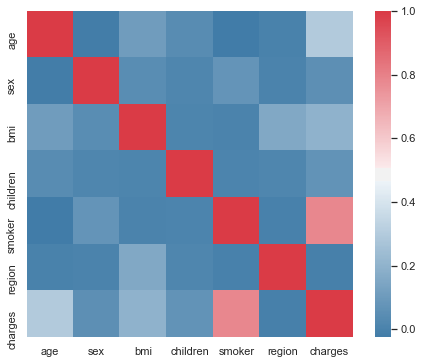

In [9]:
f, ax = plt.subplots(figsize=(8, 6))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

Next we plot the distribution of charges,we can see the range of how much patients spend on medical charges. Normally the distribution of the target values allows us to see if there exist outliers with a visual method. In this case, the long tail tell us that there might exist outliers. 

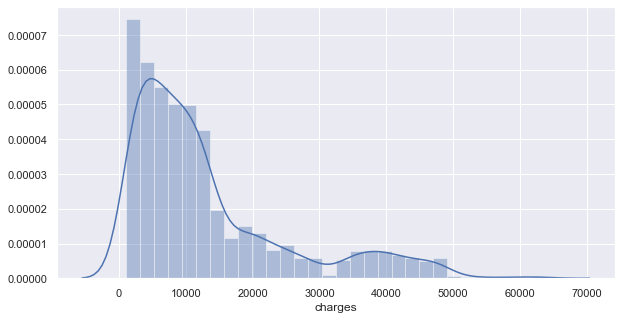

In [10]:
plt.figure(figsize = (10,5))
sns.distplot(df['charges'])

We are going to explore more the strong correlation of the smoker status and the total amount of medical charges

Text(0.5, 1.0, 'Distribution of medical charges for non-smokers')

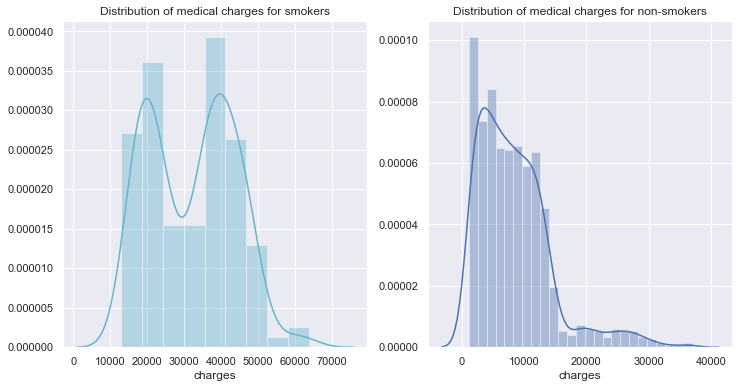

In [11]:
f= plt.figure(figsize=(12,6))

ax=f.add_subplot(1,2,1)
sns.distplot(df[(df.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of medical charges for smokers')

ax=f.add_subplot(1,2,2)
sns.distplot(df[(df.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of medical charges for non-smokers')

As expected, smoker patients pay more in average for the medical insurance than non smoker patients. We can also see in the following plot that the number of non smokers are more than the number of smokers, and that is true for both sex (male and female). Let's remember that: Male=1, Female=0.

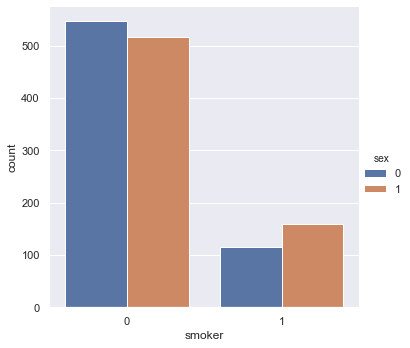

In [12]:
sns.catplot(x="smoker", kind="count",hue = 'sex', data=df)

In the following plot we can see the distribution of charges for the smoker and non smoker people regarding its sex. Smokers pay a lot more than non smokers.

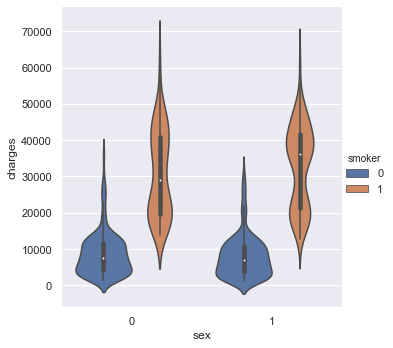

In [13]:
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=df)

On the following graph we can observe that the medical charges increases in proportion with the age of the person and that is true for smoker and non smokers but we can see that the charges and the age of person are really dependent in the case of non smokers.

Text(0.5, 1, 'Smokers and non-smokers')

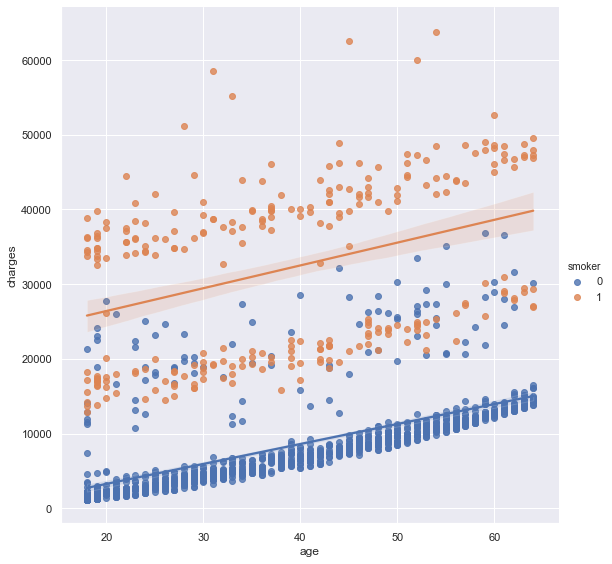

In [14]:
sns.lmplot(x="age", y="charges", hue="smoker", data=df,height=8)
ax.set_title('Smokers and non-smokers')

## Outliers Analysis

An outlier is a data point that differs significantly from other observations.A data point that is rare, or distinct, or does not fit in some way is called an outlier or a data anomaly.

The causes for the existence of an outlier are:

* Data entry errors or human errors
* Measurement errors 
* Intentional (useful for analysis on synthetic data)
* Sampling errors (extracting or mixing data from wrong or various sources)
* Natural (not an error, novelties in data)

We can use statistical methods to identify outliers in the given data of analysis.But because of the natural cause of existence of an outlier, we cannot remove all the values identified as outliers. Plotting the identified outlier values, in the context of non-outlier values is useful to see if there are any systematic relationships or correlations. 

Outlier can be of two types:
1. Univariate: Univariate outliers can be found when looking at a distribution of values in a single feature space.
2. Multivariate: ultivariate outliers can be found in a n-dimensional space (of n-features).

## 1) Univariate outliers

### A) Interquartile Range Method

Interquartile Range (IQR) is used to build the boxplot graphs. IQR is a concept in statistics that is used to measure the statistical dispersion and data variability by dividing the dataset into quartiles.

<div>
<img src="Images/boxplot4.bmp" width="500"/>
</div>

IQR can be defined as the difference between the third quartile and the first quartile (IQR = Q3 -Q1). Outliers in this case are the observations that are below (Q1 − 1.5x IQR) or boxplot lower whisker or above (Q3 + 1.5x IQR) or boxplot upper whisker.

<div>
<img src="Images/boxplot5.png" width="500"/>
</div>

Let's first find if there is any univariate outlier, we are going to use the boxplot function of the sns library.

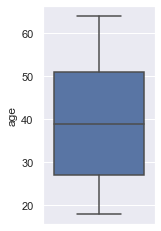

In [15]:
plt.figure(figsize = (2,4))
sns.boxplot(y = df.age)

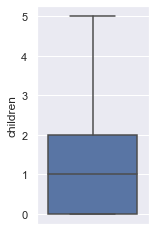

In [16]:
plt.figure(figsize = (2,4))
sns.boxplot(y = df.children)

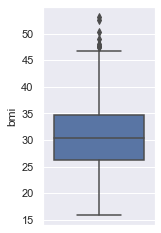

In [17]:
plt.figure(figsize = (2,4))
sns.boxplot(y = df.bmi)

From all the box plots, we can see that there are outliers on the bmi column values. From here we can determine the IQR and the lower and upper bounds to get the exact number of outliers in the bmi column.

In [18]:
lower,upper=helper.out_iqr(df,'bmi')

The IQR is 8.3975
The lower bound value is 13.7
The upper bound value is 47.290000000000006
Total number of outliers are 9


We can obtain a graphical representation by using the the distplot function of sns, the red bars represent the outliers zone.

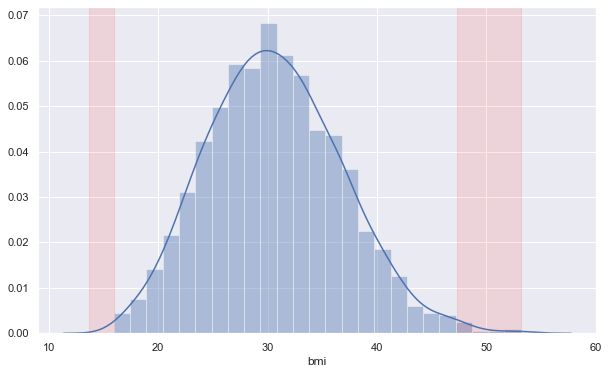

In [19]:
plt.figure(figsize = (10,6))
sns.distplot(df.bmi, kde=True)
plt.axvspan(xmin = lower,xmax= df.bmi.min(),alpha=0.1, color='red')
plt.axvspan(xmin = upper,xmax= df.bmi.max(),alpha=0.1, color='red')

### B) Z-Score Method

The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. Z-score gives you an idea of how far from the mean a data point is

By calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers. For this, we need to use a threshold to determine which values are really far away from zero, in most of the cases a threshold of 3 or -3 is used, if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

Formula for Z score = (Observation — Mean)/Standard Deviation.

This technique assumes that we have Gaussian distribution on the data. The outliers are then, the data points that are in the tails of the distribution and distant from the mean.

$\mathbf{z}=(\mathbf{X}-\boldsymbol{\mu}) / \boldsymbol{\sigma}$

Let's check again the distribution of charges, we can see that the right tail is long, and that denotes the pressence of outliers.

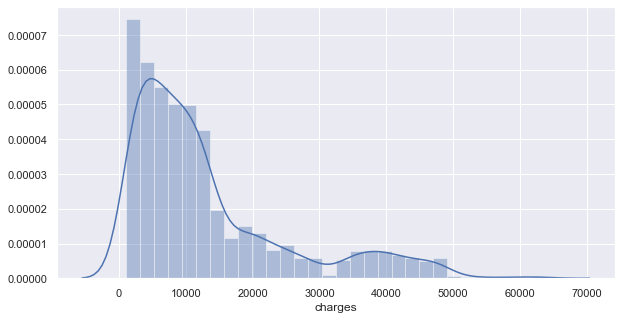

In [20]:
plt.figure(figsize = (10,5))
sns.distplot(df['charges'])

In [21]:
zscore,outliers = helper.out_zscore(df.charges)

Total number of outliers are 7


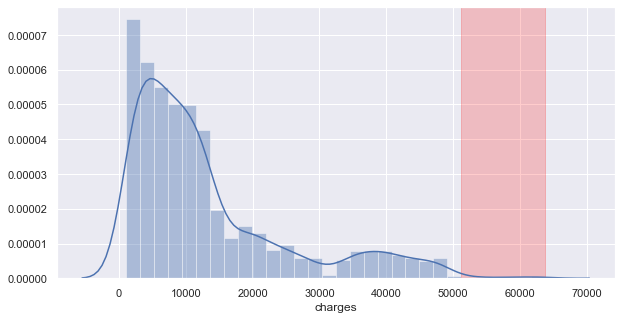

In [22]:
plt.figure(figsize = (10,5))
sns.distplot(df['charges'])
plt.axvspan(xmin = min(zscore) ,xmax= max(zscore),alpha=0.2, color='red')

## 2) Multivariate outliers

### A) DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

Clustering algorithm that clusters points together and identifies any points that do not belong to a cluster as outliers. It is similar to K-means algorithm, except the number of clusters does not need to be specified in advance.

There are three important concepts of DBSCAN:

* Core Points: In order to understand the concept of the core points, we need to visit some of the hyperparameters used to define DBScan job. First hyperparameter (HP) is min_samples. This is simply the minimum number of core points needed in order to form a cluster. second important HP is 'eps'. 'eps' is the maximum distance between two samples for them to be considered as in the same cluster.
* Border Points: belong to the same cluster as the core points but are located further away from the centre of the cluster
* Noise Points: are the data points that do not belong to any cluster. These points need further investigation to determine if they are anomalous or non-anomalous.

<div>
<img src="Images/dbscan.png" width="500"/>
</div>


For the first analysis of multivariate outliers we are going to consider the age and BMI variables.

Age and BMI

In [26]:
X = df[['age','bmi']].values

db = DBSCAN(eps=3.0, min_samples=10).fit(X)
labels = db.labels_
pd.Series(labels).value_counts()

 0    1312
-1      26
dtype: int64

The -1 category represents the points that are consider outliers, in this case 26 points had been classified as outliers. The following plot represent the datapoints, where the points in green belong to the normal cluster and the points in red are considered outliers.

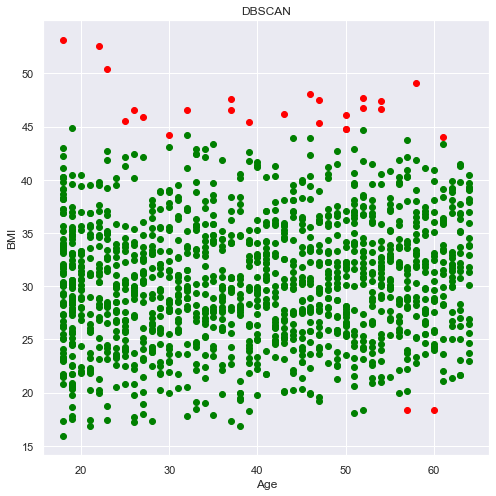

In [27]:
plt.figure(figsize=(8,8))

unique_labels = set(labels)
colors = ['green', 'red']

for color,label in zip(colors, unique_labels):
    sample_mask = [True if l == label else False for l in labels]
    plt.plot(X[:,0][sample_mask], X[:, 1][sample_mask], 'o', color=color);
plt.title("DBSCAN")
plt.xlabel('Age');
plt.ylabel('BMI');

### B) Local Outlier Factor Method(LOF):

LOF is a density-based outlier detection that identifies local outliers, points that are outliers with respect to their local neighborhood, rather than with respect to the global data distribution. The higher the LOF score for an observation, the more anomalous the observation. A point is labeled as an outlier if the density around that point is significantly different from the density around its neighbors

For this analysis of multivariate outliers we are going to consider the age and BMI variables.

Age and BMI

In [74]:
clf = LocalOutlierFactor(n_neighbors=50, contamination='auto')
X = df[['age','bmi']].values
y_pred = clf.fit_predict(X)

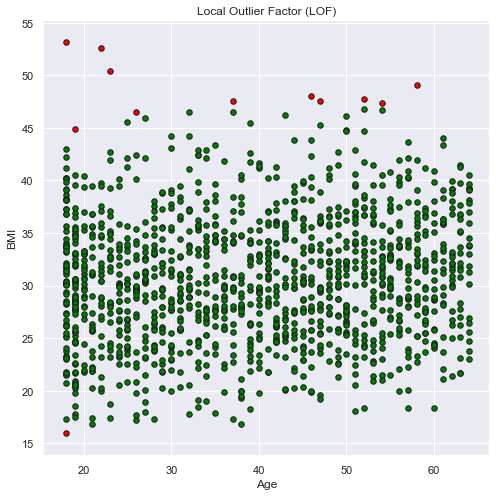

In [75]:
plt.figure(figsize=(8,8))


in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]

plt.title("Local Outlier Factor (LOF)")
# inliers
a = plt.scatter(X[in_mask, 0], X[in_mask, 1], c = 'green',
                edgecolor = 'k', s = 30)
# outliers
b = plt.scatter(X[out_mask, 0], X[out_mask, 1], c = 'red',
                edgecolor = 'k', s = 30)
plt.axis('tight')
plt.xlabel('Age');
plt.ylabel('BMI');
plt.show()

## Least Squares Linear Regression Model


In mathematical notation, if is $\hat{y}$ the predicted value.

$\hat{y}(w, x)=w_{0}+w_{1} x_{1}+\ldots+w_{p} x_{p}$

Least Squares is a standard approach in regression analysis to approximate the solution of overdetermined systems, it fits a linear model with coefficients $w=\left(w_{1}, \ldots, w_{p}\right)$ to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation. 

Mathematically it solves a problem of the form:

$\min _{w}\|X w-y\|_{2}^{2}$

## RandomForestRegressor

The random forest model is a type of additive model that makes predictions by combining decisions from a sequence of base models. More formally we can write this class of models as:

$g(x)=f_{0}(x)+f_{1}(x)+f_{2}(x)+\ldots$

where the final model $g$ is the sum of simple base models $f_{i}$.  Here, each base classifier is a simple decision tree. This broad technique of using multiple models to obtain better predictive performance is called model ensembling. In random forests, all the base models are constructed independently using a different subsample of the data.

An input parameter to the function is the number of trees in the forest (n_estimators), we are going to use a value of 10 estimators.

In [32]:
X = df.iloc[: , 1:6]
y =  df.iloc[: , 6]

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)

In [34]:
reg1 = RandomForestRegressor(random_state=1, n_estimators=10)
reg2 = LinearRegression()

reg1.fit(X_train, y_train)
reg2.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

The next plot compares the individual predictors, we can see a comparison of the predicted value of the random forest regressor, the linear regressor and the real value.

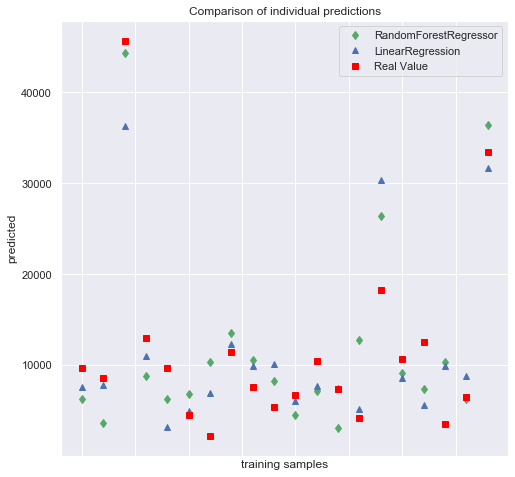

In [35]:

xt = X_test[:20]
yt = y_test[:20].to_numpy()
plt.figure(figsize=(8,8))
plt.plot(reg1.predict(xt), 'gd', label='RandomForestRegressor')
plt.plot(reg2.predict(xt), 'b^', label='LinearRegression')
plt.plot(yt, 'ys', label='Real Value',color="red")
plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Comparison of individual predictions')
plt.show()

The next thing to perform is to analyze our prediction models. We are going to use 2 metrics to evaluate the models 
performance.

__Mean squared error__

 MSE is a risk metric corresponding to the expected value of the squared (quadratic) error or loss.

__$\mathrm{R}^{2}$ score, the coefficient of determination__

The $R^2$ score function computes the coefficient of determination, usually denoted as $R^{2}$. It represents the proportion of variance (of y) that has been explained by the independent variables in the model. It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R² score of 0.0.

In [36]:
from sklearn.metrics import mean_squared_error,r2_score
print("RandomForestRegressor:")
y_pred1 = reg1.predict(X_test)
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred1, squared=False))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred1))

RandomForestRegressor:
Mean squared error: 6588.57
Coefficient of determination: 0.72


In [37]:

y_pred2 = reg2.predict(X_test)
print("LinearRegression:")
print('Coefficients: \n', reg2.coef_)
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred2, squared=False))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred2))

LinearRegression:
Coefficients: 
 [  -82.11810994   388.97320684   646.81779081 23133.8242426
  -487.45987123]
Mean squared error: 6875.30
Coefficient of determination: 0.70


We can see that the random forest regressor with has the lowest MSE and the highest coefficient of determination that makes the best predictor model for the dataset.
We are going to employ another library called statmodels to perform the least squares linear regression, and the compare the results to the previous models, one important feature of this library is that it gives us a detailed information about calculated model.

In [57]:

import statsmodels.api as sm
model = sm.OLS(y_train,X_train)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.841
Model:                            OLS   Adj. R-squared (uncentered):              0.840
Method:                 Least Squares   F-statistic:                              1054.
Date:                Wed, 13 May 2020   Prob (F-statistic):                        0.00
Time:                        12:55:58   Log-Likelihood:                         -10319.
No. Observations:                1003   AIC:                                  2.065e+04
Df Residuals:                     998   BIC:                                  2.067e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sex         -272.8006    446.560     -0.611      0.541   -1149.106     603.505
bmi          296.0512     15.427     19.191      0.000     265.779     326.324
children     571.6596    184.802      3.093      0.002     209.014     934.305
smoker      2.298e+04    559.283     41.086      0.000    2.19e+04    2.41e+04
region      -567.4803    204.038     -2.781      0.006    -967.873    -167.088
==============================================================================
Omnibus:                      149.025   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.822
Skew:                           0.937   Prob(JB):                     1.03e-56
Kurtosis:                       4.630   Cond. No.                         78.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We are going to analyze again the correlation plot to decide which features we can drop to see if the model. Lets remember that a co-efficient close to 1 means that there is a very strong positive correlation between the two variables. A value of ± 1 indicates a perfect degree of association between the two variables. As the correlation coefficient value goes towards 0, the relationship between the two variables will be weaker. The direction of the relationship is indicated by the sign of the coefficient; a + sign indicates a positive relationship and a - sign indicates a negative relationship.
The strongest correlation according to the next plot belongs to the smoker variable, and the weakest relations (closer to 0) are with children, region and sex. 

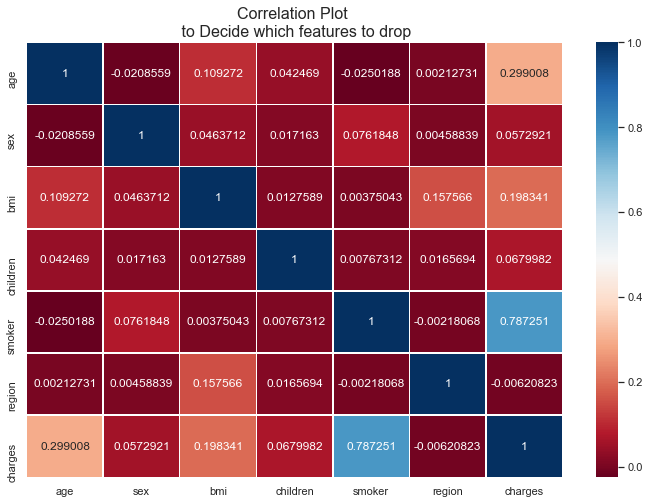

In [58]:
fig = plt.figure(figsize=(12,8))

corr = df.corr()
ax = sns.heatmap(corr, linewidths=.5, cmap="RdBu", annot=True, fmt="g")
plt.title("Correlation Plot \n to Decide which features to drop", fontsize=16)
plt.show()

We are going to drop the weakest  of all the correlations, and it's between charges and region.

In [65]:
df_drop1 = df.drop(['region'], axis=1, inplace=False)

In [68]:
X1 = df_drop1.iloc[: , 1:5]
print(X1.shape)
y1 =  df_drop1.iloc[: , 5]
print(y1.shape)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1,random_state = 0,test_size=0.25)

(1338, 4)
(1338,)


In [69]:
reg1_m = RandomForestRegressor(random_state=1, n_estimators=10)
reg2_m = LinearRegression()

reg1_m.fit(X1_train, y1_train)
reg2_m.fit(X1_train, y1_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
print("RandomForestRegressor:")
y1_pred1 = reg1_m.predict(X1_test)
print('Mean squared error: %.2f'
      % mean_squared_error(y1_test, y1_pred1, squared=False))
print('Coefficient of determination: %.2f'
      % r2_score(y1_test, y1_pred1))

RandomForestRegressor:
Mean squared error: 6599.02
Coefficient of determination: 0.72


In [71]:

y1_pred2 = reg2_m.predict(X1_test)
print("LinearRegression:")

print('Mean squared error: %.2f'
      % mean_squared_error(y1_test, y1_pred2, squared=False))
print('Coefficient of determination: %.2f'
      % r2_score(y1_test, y1_pred2))

LinearRegression:
Mean squared error: 6866.93
Coefficient of determination: 0.70


We can see from the outputs that dropping the feature 'region' does not make any significant changes in the result mean squared error and the coefficient of determination, but reduces our models complexity, which is good since we want to keep a simple and accurate regressor.

Let's see again the summary of the linear regression using the statistics model library.

In [73]:
model2 = sm.OLS(y1_train,X1_train)
model2.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.839
Model:                            OLS   Adj. R-squared (uncentered):              0.839
Method:                 Least Squares   F-statistic:                              1306.
Date:                Wed, 13 May 2020   Prob (F-statistic):                        0.00
Time:                        13:04:06   Log-Likelihood:                         -10323.
No. Observations:                1003   AIC:                                  2.065e+04
Df Residuals:                     999   BIC:                                  2.067e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sex         -286.0346    448.038     -0.638      0.523   -1165.238     593.169
bmi          268.7392     11.938     22.512      0.000     245.314     292.165
children     543.5544    185.147      2.936      0.003     180.233     906.876
smoker      2.299e+04    561.147     40.972      0.000    2.19e+04    2.41e+04
==============================================================================
Omnibus:                      150.368   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.810
Skew:                           0.949   Prob(JB):                     1.04e-56
Kurtosis:                       4.602   Cond. No.                         78.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Conclusion

We performed an EDA analysis on the Medical Insurance Cost dataset that we obtained from the kaggle platform. The EDA analysis allowed us to see the different statistical characteristic of the dataset, with the help of  didactic visualizations. We explored different outliers detection techniques. According to the type of outliers (univariate or multivariate), different approaches can be taken to detect the possible presence outliers on the dataset. We reviewed multiple techniques of univariate and multivariate outliers detection techniques, and saw the presence of both types of outliers. During the analysis we could actually detect that there were relations between the univariate and multivariate outliers, so removing them from the dataset could not be beneficial and affect the performance  of the model. 



On the analysis of a synthetic dataset we will compare and analyze the performance with and without the presence of outliers during the model regression process.

<h1 class="unnumbered" id="bibliography">Bibliography</h1>
<div id="refs" class="references hanging-indent" role="doc-bibliography">
<div id="ref-choi_2018">
<p>Choi, Miri. 2018. “Medical Cost Personal Datasets.” <em>Kaggle</em>. <a href="https://www.kaggle.com/mirichoi0218/insurance">https://www.kaggle.com/mirichoi0218/insurance</a>.</p>
</div>
<div id="ref-statistics_how_to_2019">
<p>“Correlation in Statistics: Correlation Analysis Explained.” 2019. <em>Statistics How To</em>. <a href="https://www.statisticshowto.com/probability-and-statistics/correlation-analysis/">https://www.statisticshowto.com/probability-and-statistics/correlation-analysis/</a>.</p>
</div>
<div id="ref-patil_2018">
<p>Patil, Prasad. 2018. “What Is Exploratory Data Analysis?” <em>Medium</em>. Towards Data Science. <a href="https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15">https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15</a>.</p>
</div>
<div id="ref-santoyo_2017">
<p>Santoyo, Sergio. 2017. “A Brief Overview of Outlier Detection Techniques.” <em>Medium</em>. Towards Data Science. <a href="https://towardsdatascience.com/a-brief-overview-of-outlier-detection-techniques-1e0b2c19e561">https://towardsdatascience.com/a-brief-overview-of-outlier-detection-techniques-1e0b2c19e561</a>.</p>
</div>
<div id="ref-random_forest_regression">
<p>“Turi Machine Learning Platform User Guide.” n.d. <em>Random Forest Regression | Turi Machine Learning Platform User Guide</em>. <a href="https://turi.com/learn/userguide/supervised-learning/random_forest_regression.html">https://turi.com/learn/userguide/supervised-learning/random_forest_regression.html</a>.</p>    
</div>
</div>

# **2) Regression - Synthetic datasets**

## An outliers detection methods analysis and its impact on a synthetic dataset on different regression methods.
---
## Introduction

On this section of the notebook, we are going to explore an analyze the impact of outliers on a synthetic dataset. For this purpose we are going to generate a synthetic dataset with the help of the sklearn make_regression method, and we are going to add outliers to it using the numpy library. We are going to see how the presence of outliers greatly increases the MSE error on a linear regression. We are going to apply the LOF  outlier removal technique already reviewed on the previous section, and calculate the MSE score and compare the results.

In [2]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

## Generation of synthetic data

We are going to generate a synthetic dataset of 400 points using the make_regression function from the sklearn kit.

Where:

* n_samples = The number of samples.
* n_features = The number of features.
* noise = The standard deviation of the gaussian noise applied to the output.
* random_state = Determines random number generation for dataset creation.
* bias = The bias term in the underlying linear model.

In [3]:
rng = np.random.RandomState(0)
X, y = make_regression(n_samples=400, n_features=1, random_state=0, noise=4.0,
                       bias=80.0)

After the creation of the synthetical data, we procced to add **outliers** in the dataset, we are going to add 10 outliers in total.

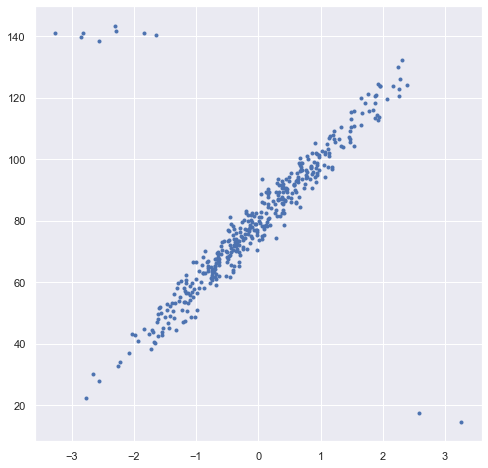

In [4]:
plt.figure(figsize=(8,8))
X_outliers = rng.normal(0, 0.5, size=(10, 1))
y_outliers = rng.normal(0, 2.0, size=10)
X_outliers[:2, :] += X.max() + X.mean() / 10.
X_outliers[2:, :] += X.min() - X.mean() / 10.
y_outliers[:2] += y.min() - y.mean() / 10.
y_outliers[2:] += y.max() + y.mean() / 10.
X = np.vstack((X, X_outliers))
y = np.concatenate((y, y_outliers))
plt.plot(X, y, 'b.')

We can apply a Least Squares Linear Regression Model to the data, and we can see from the following plot that the data is not well-fitte, this is mainly due to the reason that the model has a strong presence of outliers that affect the linear regression.

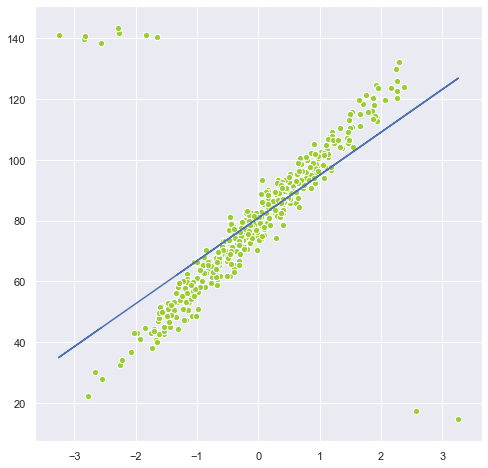

In [5]:
plt.figure(figsize=(8,8))
lin_reg = LinearRegression()
lin_reg.fit(X, y)
plt.plot(X, lin_reg.predict(X), color='b')
plt.scatter(X,y,color='yellowgreen', s = 40, edgecolor = 'white')

We're going to calculate the MSE and the $R^2$ score.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25) 

In [7]:
from sklearn.metrics import mean_squared_error,r2_score
reg1 = LinearRegression()
reg1.fit(X_train, y_train)
print("Linear Regression with outliers presence:")
y_pred1 = reg1.predict(X_test)
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred1, squared=False))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred1))

Linear Regression with outliers presence:
Mean squared error: 15.45
Coefficient of determination: 0.43


It is possible to see that both scores are not good, the MSE is high and the coefficient $R^2$ is low, and that's because the result is biased towards the presence of outliers.


Let's now apply the **Local Outlier Factor algorithm** to detect the outliers and remove them from the dataset.

In [8]:
Xs=np.squeeze(X)
df = pd.DataFrame({'X': Xs, 'y': y})

The auto parameter denotes the amount of contamination of the data set, i.e. the proportion of outliers in the data set. When fitting this is used to define the threshold on the scores of the samples. If the value is set to auto a calculation method will be used according to the research paper of LOF.

In [9]:
clf = LocalOutlierFactor(n_neighbors=40, contamination='auto')
Xs = df[['X','y']].values
y_pred = clf.fit_predict(Xs)

In the following graph, we can see the the outliers are colored in red, adn the normal dataset points are colored in green. We can see that LOF detects all the strong outliers, but also identifies some dataset point as outliers, but in this specific scenario, this situation won't affect the final results.

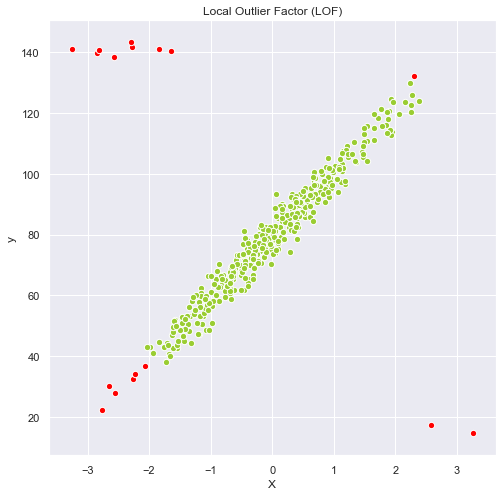

In [10]:
plt.figure(figsize=(8,8))

in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]

plt.title("Local Outlier Factor (LOF)")
# inliers
a = plt.scatter(Xs[in_mask, 0], Xs[in_mask, 1], c = 'yellowgreen',
                edgecolor = 'white', s = 40)
# outliers
b = plt.scatter(Xs[out_mask, 0], Xs[out_mask, 1], c = 'red',
                edgecolor = 'white', s = 40)
plt.axis('tight')
plt.xlabel('X');
plt.ylabel('y');
plt.show()


Now that the ouliers are identified, we can proceed to remove them from the dataset, on the following snippet of code we will remove the dataset points masked as outliers with the help of the **drop** pandas method.

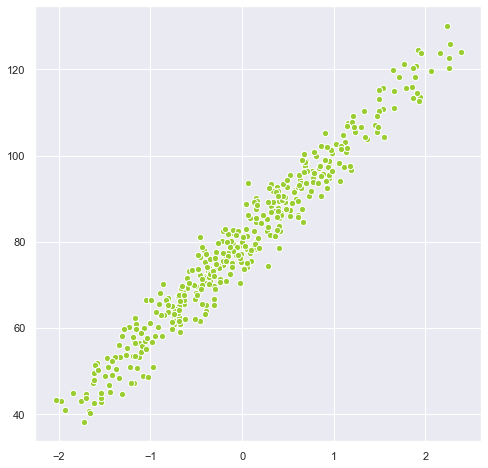

In [11]:
plt.figure(figsize=(8,8))
df['mask'] =y_pred
df.drop(df[df['mask'] == -1].index, inplace=True)
df.drop(columns=['mask'])
plt.scatter(df['X'], df['y'], color='yellowgreen' ,s = 40, edgecolor = 'white')

Now we can apply the regression model to the cleaned dataset.

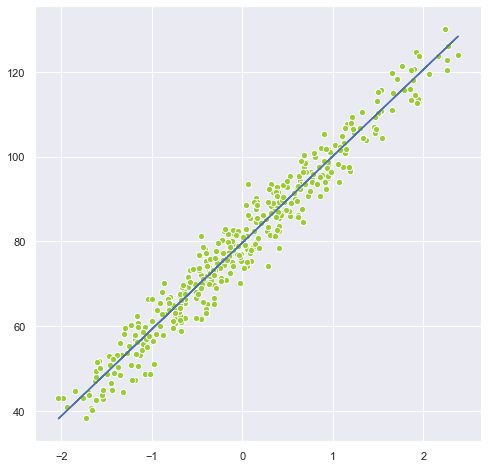

In [12]:
plt.figure(figsize=(8,8))
X_mod= df.iloc[:, 0:1]
y_mod= df.iloc[:, 1]
lin_reg.fit(X_mod, y_mod)
plt.plot(X_mod, lin_reg.predict(X_mod), color='b')
plt.scatter(X_mod,y_mod,color='yellowgreen', s = 40, edgecolor = 'white')

Let's now calculate the MSE and the $R^2$ metrics to see what's the difference with the past results.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_mod, y_mod,random_state = 0,test_size=0.25) 

In [14]:
reg1 = LinearRegression()
reg1.fit(X_train, y_train)
print("Linear Regression without outliers:")
y_pred1 = reg1.predict(X_test)
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred1, squared=False))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred1))

Linear Regression without outliers:
Mean squared error: 4.22
Coefficient of determination: 0.95


Now, thanks to the work of **LOF**, the metrics of MSE are low, and the coefficient of determination is high, which means that now our predictions have more confidence.

### Comparing with other regression models

On this subsection we are going to analyze what is the accuracy and error of different regression models with the presence of outliers.

#### Huber Regression

Huber regression is a technique that is robust to the presence of outliers. It uses a specialized loss function called huber loss, rather than the least-squares error loss function.



$$_{i=1}^{m}\left(y_{i}-x_{i}^{T}\right)$$

for variable $\beta \in \mathbf{R}^{n},$ where the loss $\phi$ is the Huber loss function with threshold $ M>0 $


$\phi(u)=\left\{\begin{array}{ll}
u^{2} & \text { if }|u| \leq M \\
2 M u-M^{2} & \text { if }|u|>M
\end{array}\right.$


This function is identical to the least squares penalty for small residuals, but on large residuals, its penalty is lower and increases linearly rather than quadratically. It is thus more forgiving of outliers.

#### Ridge Regression

Ridge Regression augments the Ordinary Least Squares (OLS)  loss function so that we not only minimize the sum of squared residuals but also penalize the size of parameter estimates, with the goal of shrinking them to zero.


$$L_{\text {ridge}}(\hat{\beta})=\sum_{i=1}^{n}\left(y_{i}-x_{i}^{\prime} \hat{\beta}\right)^{2}+\lambda \sum_{j=1}^{m} \hat{\beta}_{j}^{2}=\|y-X \hat{\beta}\|^{2}+\lambda\|\hat{\beta}\|^{2}$$

Solving this for $\hat{\beta}$ gives the the ridge regression estimates $\hat{\beta}_{\text {ridge}}=\left(X^{\prime} X+\lambda I\right)^{-1}\left(X^{\prime} Y\right),$ where $I$
denotes the identity matrix.


The $\lambda$ parameter is the regularization penalty.

As $\lambda \rightarrow 0, \quad \hat{\beta}_{\text {ridge}} \rightarrow \hat{\beta}_{\text {OLS}}$

as $\lambda \rightarrow \infty, \quad \hat{\beta}_{\text {ridge}} \rightarrow 0$

Setting $\lambda$ closer to 0 makes the model similar to OLS. Setting $\lambda$ larger than 0, the coefficient are going to be penalized strongly.

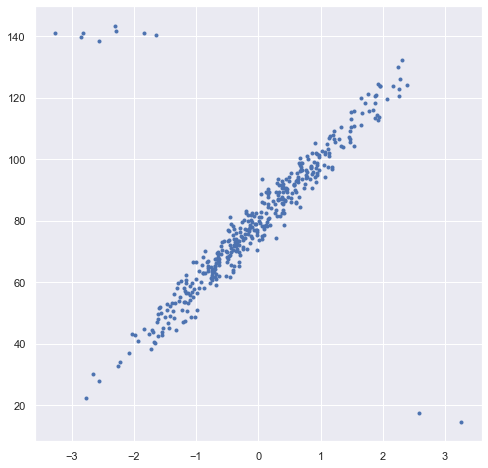

In [15]:
plt.figure(figsize=(8,8))
plt.plot(X, y, 'b.')

On the following cell we are going to implement three linear regression methods. The hyper-parameters for each methods are the following:

* **Linear Regression**: No hyper-parameter tunning needed.

* **Huber Regression**: 
    * alpha: 0.0 - Regularization parameter.
    * epsilon: 1.35 - Controls the number of samples that should be classified as outliers. The smaller the epsilon, the more robust it is to outliers.
* **Ridge Regression**:
    * alpha: 0.1 - Regularization strength parameter that improves the conditioning of the problem, and decreases the variance of the estimates. A larger value of regularization means a stronger regularization parameter.
    * normalization: True -  True value means that the  regressors X will be normalized before regression by subtracting the mean and dividing by the L2-norm (Euclidean norm).
    * solver: cholesky - Uses a solver that employs a matrix factorization technique, a variant of the following equation: $$\widehat{\boldsymbol{\theta}}=\left(\mathbf{X}^{\top} \mathbf{X}+\alpha \mathbf{A}\right)^{-1} \mathbf{X}^{\top} \mathbf{y}$$

Linear Regression(OLS) Parameters:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
Ridge Parameters:  {'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': True, 'random_state': 0, 'solver': 'cholesky', 'tol': 0.001}
Huber Parameters:  {'alpha': 0.0, 'epsilon': 1.35, 'fit_intercept': True, 'max_iter': 100, 'tol': 1e-05, 'warm_start': False}


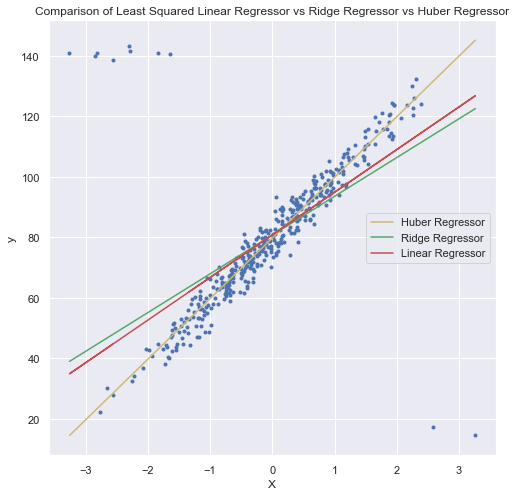

In [32]:
from sklearn.linear_model import HuberRegressor, Ridge

plt.figure(figsize=(8,8))
lin_reg = LinearRegression()
ridge = Ridge(alpha=0.1, random_state=0, normalize=True, solver='cholesky')
huber = HuberRegressor(alpha=0.0, epsilon=1.35)
x = np.linspace(X.min(), X.max(), 7)
print("Linear Regression(OLS) Parameters: ", lin_reg.get_params())
print("Ridge Parameters: ", ridge.get_params())
print("Huber Parameters: ", huber.get_params())
ridge.fit(X, y)
lin_reg.fit(X, y)
huber.fit(X, y)



coef_h = huber.coef_ * x + huber.intercept_
coef_ridge = ridge.coef_
coef_r = ridge.coef_ * x + ridge.intercept_
plt.plot(X, y, 'b.')
plt.plot(x, coef_h, color='y', label="Huber Regressor")
plt.plot(x, coef_r, 'g-', label="Ridge Regressor")
plt.plot(X, lin_reg.predict(X), color='r', label="Linear Regressor")
plt.title("Comparison of Least Squared Linear Regressor vs Ridge Regressor vs Huber Regressor")
plt.xlabel("X")
plt.ylabel("y")
plt.legend(loc=0)
plt.show()






We can observe from the plot that the Huber regression is not heavily influenced by outliers as stated on its theory description.**Huber regressor follows the linear trend of the data and its not affected by the presence of outliers**. Ridge regressor is very similar to the OLS regressor and is affected by the presence of outliers.*

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25) 
regressors = [lin_reg, ridge, huber]
for r in regressors:
    r.fit(X_train, y_train)
    if(r==lin_reg):
        print("\n Linear Regression with outliers:")
    elif(r==ridge):
        print("\n Ridge Regression with outliers:")
    elif(r==huber):
        print("\n Huber Regression with outliers:")
    y_pred1 = r.predict(X_test)
    print('Mean squared error: %.2f'
          % mean_squared_error(y_test, y_pred1, squared=False))
    print('Coefficient of determination: %.2f'
          % r2_score(y_test, y_pred1))


 Linear Regression with outliers:
Mean squared error: 15.45
Coefficient of determination: 0.43

 Ridge Regression with outliers:
Mean squared error: 15.43
Coefficient of determination: 0.43

 Huber Regression with outliers:
Mean squared error: 16.94
Coefficient of determination: 0.31


## Conclusion

We created a synthetic dataset using the make regression method from the sklearn library. We applied three regression methods on the dataset with the presence of outliers. The results of the MSE risk metric we could actually see how the presence of outliers increases the error with all the regression methods except when using the huber regression model, where the model proved to be strong to the presence of outliers.

**The LOF outlier detection technique** helped us to detect the outliers on the synthetic dataset. The outlier removal process is an essential part of a dataset normalization process, but it is important to be sure that no errors are made during the analysis of the influence of the outliers on the dataset. In this case, since the dataset was created artificially we were sure that the points detected by the LOF technique were real outliers that affected the linear regression.

<h1 class="unnumbered" id="bibliography">Bibliography</h1>
<div id="refs" class="references hanging-indent" role="doc-bibliography">
<div id="ref-huber_1964">
<p>Huber, Peter J. 1964. “Robust Estimation of a Location Parameter.” <em>The Annals of Mathematical Statistics</em> 35 (1): 73–101. <a href="https://doi.org/10.1214/aoms/1177703732">https://doi.org/10.1214/aoms/1177703732</a>.</p>
</div>
<div id="ref-cvxr">
<p>“Huber Regression.” n.d. <em>CVXR</em>. <a href="https://cvxr.rbind.io/cvxr_examples/cvxr_huber-regression/">https://cvxr.rbind.io/cvxr_examples/cvxr_huber-regression/</a>.</p>
</div>
<div id="ref-datacamp_community">
<p>“(Tutorial) Regularization: Ridge, Lasso and Elastic Net.” n.d. <em>DataCamp Community</em>. <a href="https://www.datacamp.com/community/tutorials/tutorial-ridge-lasso-elastic-net">https://www.datacamp.com/community/tutorials/tutorial-ridge-lasso-elastic-net</a>.</p>
</div>
<div id="ref-scikit">
<p>n.d. <em>Scikit</em>. <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html">https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html</a>.</p>
</div>
</div>